<a href="https://colab.research.google.com/github/meetdarbar93/AI-ML-Internship/blob/main/Day7/Day7_RegressionModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Results:
MAE: 6286.453830757749
MSE: 49830096.85590839
R²: 0.9024461774180497


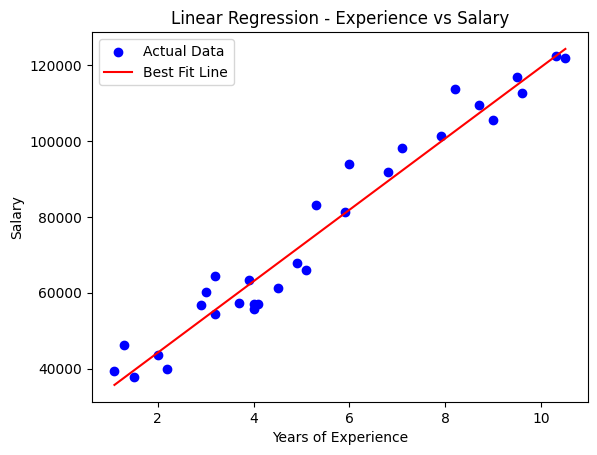

In [1]:
# Task 1: Linear Regression Model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

url = "https://gist.githubusercontent.com/saikrishnapotluri/33ace369025ec4de0dfb9f22a0c5b09f/raw/salary_Data.csv"
df = pd.read_csv(url)

X = df[['YearsExperience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)

plt.scatter(X, y, label="Actual Data",color="b")

plt.plot(X, lr.predict(X), label="Best Fit Line",color="r")

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression - Experience vs Salary")
plt.legend()
plt.show()


Logistic Regression Report (without scaling):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



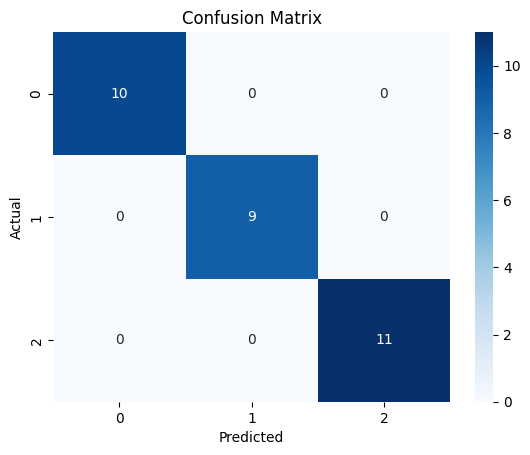

In [2]:
# Task 2: Logistic Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log = LogisticRegression(max_iter=300)
log.fit(X_train, y_train)

y_pred = log.predict(X_test)

print("Logistic Regression Report (without scaling):")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [3]:
# Task 3: Effect of Scaling

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Without scaling
log1 = LogisticRegression(max_iter=300)
log1.fit(X_train, y_train)
pred1 = log1.predict(X_test)
acc_no_scaling = accuracy_score(y_test, pred1)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log2 = LogisticRegression(max_iter=300)
log2.fit(X_train_scaled, y_train)
pred2 = log2.predict(X_test_scaled)
acc_scaling = accuracy_score(y_test, pred2)

print("Accuracy Without Scaling:", acc_no_scaling)
print("Accuracy With Scaling:", acc_scaling)


Accuracy Without Scaling: 1.0
Accuracy With Scaling: 1.0


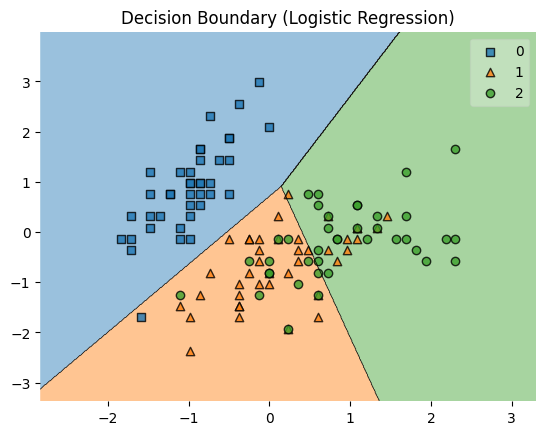

In [4]:
# Task 4: Visualize Decision Boundary
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X_vis = X_train_scaled[:, :2]
y_vis = y_train.values

log_boundary = LogisticRegression(max_iter=300)
log_boundary.fit(X_vis, y_vis)

plot_decision_regions(X_vis, y_vis, clf=log_boundary)
plt.title("Decision Boundary (Logistic Regression)")
plt.show()


In [5]:
# Task 5: Model Comparison Table

comparison = {
    "Model": ["Linear Regression", "Logistic Regression"],
    "Dataset Used": ["Salary Dataset", "Iris Dataset"],
    "Accuracy / R²": [round(r2, 3), round(acc_scaling, 3)],
    "Scaling Used?": ["No", "Yes"],
    "Notes": ["Good linear fit", "Scaling improved accuracy"]
}

df_result = pd.DataFrame(comparison)
df_result.to_csv("Day6_Model_Comparison.csv", index=False)

df_result


,Model,Dataset Used,Accuracy / R²,Scaling Used?,Notes
0,Linear Regression,Salary Dataset,0.902,No,Good linear fit
1,Logistic Regression,Iris Dataset,1.000,Yes,Scaling improved accuracy
